# AI-generated Notebook with Human Supervision: Exploring Neuropixels Data from DANDI Archive

**Important:** This notebook was AI-generated with human supervision and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an example of how to explore and analyze neurophysiology data stored in the DANDI Archive, specifically focusing on Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation (Dandiset [001335](https://dandiarchive.org/dandiset/001335)).

## Introduction to the Dataset

This dataset contains neural activity recorded from the hippocampus of head-fixed mice during odor presentation using Neuropixels probes.

**Description:** Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.

**Keywords:** ecephys, neuropixels, odor-sequences, hippocampus

## Accessing the Data

To access the data, you will need to install the `dandiapi` client:

```bash
pip install dandi
```

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())
print(f"Number of assets in Dandiset 001335: {len(assets)}")
for asset in assets:
  print(f"    {asset.path}")

Number of assets in Dandiset 001335: 1
    sub-M541/sub-M541_ecephys.nwb


## Loading an NWB File

We will load the NWB file "sub-M541/sub-M541_ecephys.nwb" for demonstration.

In [2]:
# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001335/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Identifier: M541-2024-08-31
Session start time: 2025-02-14 10:53:25.647928-05:00


## Exploring LFP Data

Here we demonstrate how to access and visualize Local Field Potential (LFP) data from the NWB file.

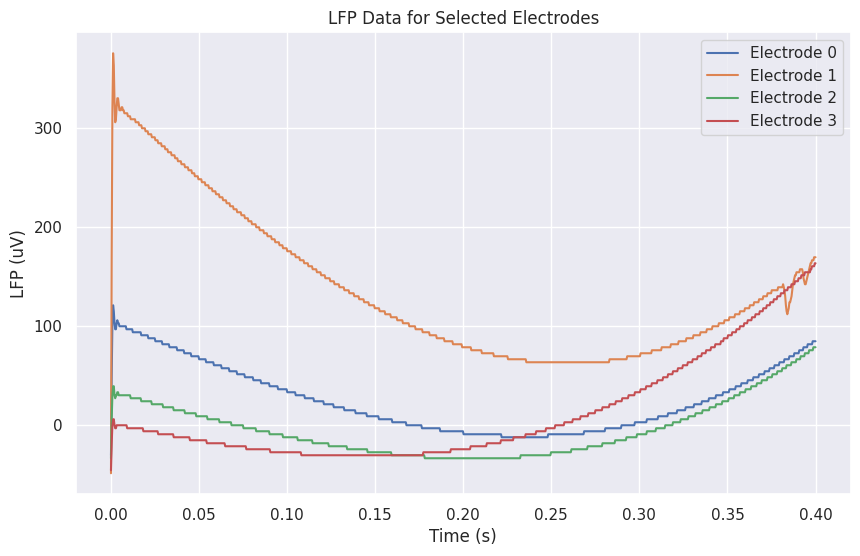

In [3]:
# Access the LFP data
ecephys = nwb.processing["ecephys"]
LFP = ecephys["LFP"]
lfp_data = LFP.data
electrodes = LFP.electrodes

# Select a subset of electrodes and time points
num_electrodes = 4
num_timepoints = 1000
electrode_indices = np.arange(num_electrodes)  # Select the first few electrodes
start_time = 0
end_time = start_time + num_timepoints / LFP.rate

# Get the LFP data for the selected electrodes and time points
lfp_subset = lfp_data[start_time:int(end_time * LFP.rate), electrode_indices]

# Create a time axis
time = np.linspace(start_time, end_time, num_timepoints)

# Plot the LFP data
plt.figure(figsize=(10, 6))
for i in range(num_electrodes):
    plt.plot(time, lfp_subset[:, i], label=f"Electrode {electrodes['id'][i]}")

plt.xlabel("Time (s)")
plt.ylabel("LFP (uV)")
plt.title("LFP Data for Selected Electrodes")
plt.legend()
plt.show()

## Exploring Spike Times

Here we demonstrate how to access and visualize spike times from the NWB file.

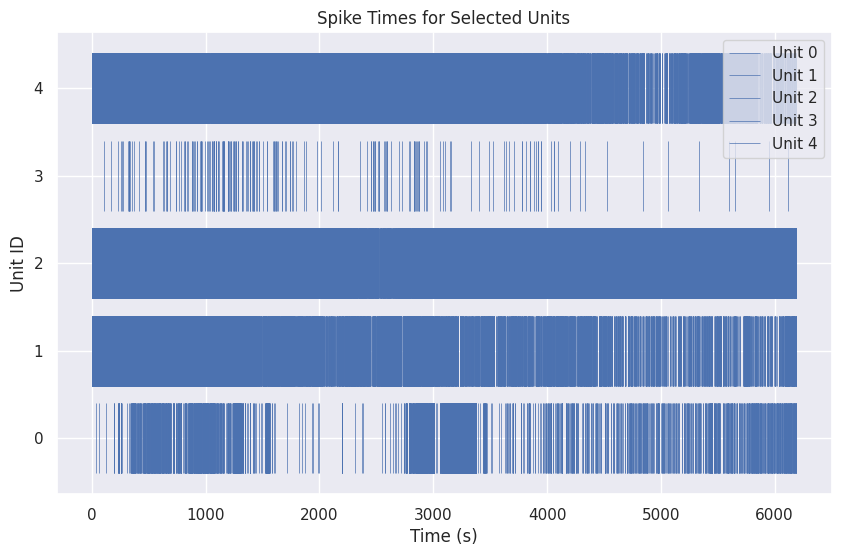

In [4]:
# Access the units data
units = nwb.units
spike_times = units["spike_times"]
unit_ids = units["id"]

# Select a subset of units to plot
num_units = 5
unit_indices = np.arange(num_units)

# Plot the spike times for each unit
plt.figure(figsize=(10, 6))
for i in unit_indices:
    spike_time_values = spike_times[i]
    plt.vlines(spike_time_values, i - 0.4, i + 0.4, linewidth=0.5, label=f"Unit {unit_ids[i]}")

plt.xlabel("Time (s)")
plt.ylabel("Unit ID")
plt.title("Spike Times for Selected Units")
plt.legend()
plt.show()

## Example Analyses

This section provides examples of common analyses that might be relevant to this dataset's content.

1.  **LFP Analysis:** Analyze the LFP data to identify oscillations and other patterns of neural activity.
2.  **Spike Time Analysis:** Analyze the spike times to identify firing patterns and relationships between different neurons.
3.  **Odor Response Analysis:** Analyze the neural activity in response to different odors.